In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [21]:
file_path = './data/default.csv'  # Replace with the correct path
df = pd.read_csv(file_path)

def rename_columns(dataframe, mapping_dict):
    """
    Rename columns in the given DataFrame using a mapping dictionary.

    Args:
    - dataframe (pd.DataFrame): The pandas DataFrame with the original column names.
    - mapping_dict (dict): A dictionary where keys are current column names and values are the new column names.

    Returns:
    - pd.DataFrame: DataFrame with renamed columns.
    """
    # Rename the columns using the provided mapping dictionary
    renamed_df = dataframe.rename(columns=mapping_dict)
    
    return renamed_df

# Define the mapping dictionary
mapping_dict = {
  "R0000100": "ID# 79",
  "R0000600": "AGE OF R 79",
  "R0001800": "AREA RESIDENCE @ AGE 14 URBAN/RURAL 79",
  "R0008800": "RS MOTHER AND FATHER LIVE IN SAME HH 79",
  "R0009100": "# OF SIBS 79",
  "R0009600": "1ST/ONLY RACL/ETHNIC ORIGIN 79",
  "R0010300": "RELGN R RAISED COLLAPSED 79",
  "R0010400": "PRSNT RELGS AFFILIATION 79",
  "R0010500": "FREQ RELGS ATTENDANCE R 79",
  "R0010600": "MARITAL STATUS 79",
  "R0013200": "# CHILDREN IDEAL FOR FAMILY 79",
  "R0013400": "# CHILDREN R HAD 79",
  "R0015300": "TOT# CHILDREN EXPCT HAVE 79",
  "R0145100": "ICHK HLTH LIMITATIONS I2A/2B YES",
  "R0146100": "ICHK MAIN HLTH COND CAUSE WRK LIMITS 79",
  "R0149800": "PERSON INFLUENCE R DEC NO CHILDREN 79",
  "R0149900": "ATND R DEC PURSUE CAREER DELAY FAM 79",
  "R0173600": "SAMPLE ID  79 INT",
  "R0214700": "RACL/ETHNIC COHORT /SCRNR 79",
  "R0214800": "SEX OF R 79",
  "R0216400": "REGION OF CURRENT RESIDENCE 79",
  "R0216601": "ENROLLMT STAT MAY 1 SURVEY YR (REV) 79",
  "R0217900": "TOT NET FAMILY INC P-C YR 79",
  "R0217910": "POVERTY STATUS 79",
  "T0857100": "# BIO CHILDREN REPORTED 2006",
  "T2015100": "# BIO CHILDREN REPORTED 2008",
  "T2998600": "# BIO CHILDREN REPORTED 2010",
  "T3942500": "# BIO CHILDREN REPORTED 2012",
  "T4876800": "# BIO CHILDREN REPORTED 2014",
  "T5593000": "# BIO CHILDREN REPORTED 2016",
}

# Rename the columns
df = rename_columns(df, mapping_dict)

# Display the first few rows of the renamed DataFrame
print(df.shape)
df.head()

(12686, 30)


,ID# 79,AGE OF R 79,AREA RESIDENCE @ AGE 14 URBAN/RURAL 79,RS MOTHER AND FATHER LIVE IN SAME HH 79,# OF SIBS 79,1ST/ONLY RACL/ETHNIC ORIGIN 79,RELGN R RAISED COLLAPSED 79,PRSNT RELGS AFFILIATION 79,FREQ RELGS ATTENDANCE R 79,MARITAL STATUS 79,...,REGION OF CURRENT RESIDENCE 79,ENROLLMT STAT MAY 1 SURVEY YR (REV) 79,TOT NET FAMILY INC P-C YR 79,POVERTY STATUS 79,# BIO CHILDREN REPORTED 2006,# BIO CHILDREN REPORTED 2008,# BIO CHILDREN REPORTED 2010,# BIO CHILDREN REPORTED 2012,# BIO CHILDREN REPORTED 2014,# BIO CHILDREN REPORTED 2016
0,1,20,1,-4,1,12,7,7,5,5,...,1,4,30000,0,-5,-5,-5,-5,-5,-5
1,2,20,1,-4,8,12,7,7,5,5,...,1,1,20000,0,2,2,2,2,2,2
2,3,17,1,-4,3,5,7,7,2,5,...,1,1,22390,0,3,3,-5,3,3,3
3,4,16,1,-4,3,3,7,7,1,5,...,1,2,22390,0,-5,-5,-5,-5,-5,2
4,5,19,1,-4,1,5,7,7,1,5,...,1,3,36000,0,-5,-5,-5,-5,-5,-5


In [22]:
columns_to_consider = [
    '# BIO CHILDREN REPORTED 2006',
    '# BIO CHILDREN REPORTED 2008',
    '# BIO CHILDREN REPORTED 2010',
    '# BIO CHILDREN REPORTED 2012',
    '# BIO CHILDREN REPORTED 2014',
    '# BIO CHILDREN REPORTED 2016'
]

# Create a new column with the maximum value from the selected columns
df['# BIO CHILDREN REPORTED'] = df[columns_to_consider].max(axis=1)
#df['# BIO CHILDREN REPORTED'] = df['# BIO CHILDREN REPORTED 2016']

# Null values

In [23]:
# Drop rows where "# BIO CHILDREN REPORTED 2016" is negative
df2 = df.loc[df['# BIO CHILDREN REPORTED'] < 0]
print(df2.shape)
df = df.loc[df['# BIO CHILDREN REPORTED'] >= 0]


# Drop rows where "TOT# CHILDREN EXPCT HAVE 79" is negative
df = df.loc[df['TOT# CHILDREN EXPCT HAVE 79'] >= 0]

df = df.drop('RS MOTHER AND FATHER LIVE IN SAME HH 79', axis=1)
df = df.drop("SEX OF R 79", axis=1)
df = df.drop(columns_to_consider, axis=1)

print(df.shape)


(8432, 31)
(4206, 23)


In [24]:
negative_counts = {}

# Iterate through each column
for column in df.columns:
    # Filter negative values and count their occurrences
    negative_values = df[column][df[column] < 0].value_counts()
    
    # If there are negative values, add them to the dictionary
    if not negative_values.empty:
        negative_counts[column] = negative_values.to_dict()

# Display the results
for key in negative_counts:
    print(key, negative_counts[key])
    
# RS MOTHER AND FATHER LIVE IN SAME HH 79 - ??????

AREA RESIDENCE @ AGE 14 URBAN/RURAL 79 {-3: 15}
# OF SIBS 79 {-3: 5, -2: 2}
1ST/ONLY RACL/ETHNIC ORIGIN 79 {-2: 18, -3: 5}
RELGN R RAISED COLLAPSED 79 {-2: 4, -3: 3, -1: 1}
PRSNT RELGS AFFILIATION 79 {-3: 8, -2: 4, -1: 1}
FREQ RELGS ATTENDANCE R 79 {-3: 4, -1: 2}
# CHILDREN IDEAL FOR FAMILY 79 {-3: 11, -2: 1}
# CHILDREN R HAD 79 {-4: 3525, -3: 8, -2: 1, -1: 1}
ICHK HLTH LIMITATIONS I2A/2B YES {-4: 94}
ICHK MAIN HLTH COND CAUSE WRK LIMITS 79 {-4: 3920}
PERSON INFLUENCE R DEC NO CHILDREN 79 {-4: 2216, -2: 66, -3: 23}
ATND R DEC PURSUE CAREER DELAY FAM 79 {-4: 2228, -2: 39, -3: 31}
REGION OF CURRENT RESIDENCE 79 {-4: 65}
ENROLLMT STAT MAY 1 SURVEY YR (REV) 79 {-3: 1}
TOT NET FAMILY INC P-C YR 79 {-2: 416, -3: 246, -1: 193}
POVERTY STATUS 79 {-3: 855}


In [25]:
df.loc[df["# CHILDREN R HAD 79"] == -4, "# CHILDREN R HAD 79"] = 0
df.loc[df['ICHK MAIN HLTH COND CAUSE WRK LIMITS 79'] == -4, 'ICHK MAIN HLTH COND CAUSE WRK LIMITS 79'] = 0

df.loc[df['PERSON INFLUENCE R DEC NO CHILDREN 79'] == -4, 'PERSON INFLUENCE R DEC NO CHILDREN 79'] = 0 # the feature should be catagorial
df.loc[df['PERSON INFLUENCE R DEC NO CHILDREN 79'] == -3, 'PERSON INFLUENCE R DEC NO CHILDREN 79'] = 0
df.loc[df['PERSON INFLUENCE R DEC NO CHILDREN 79'] == -2, 'PERSON INFLUENCE R DEC NO CHILDREN 79'] = 0

df.loc[df['ATND R DEC PURSUE CAREER DELAY FAM 79'] == -4, 'ATND R DEC PURSUE CAREER DELAY FAM 79'] = 0 # the feature should be catagorial
df.loc[df['ATND R DEC PURSUE CAREER DELAY FAM 79'] == -3, 'ATND R DEC PURSUE CAREER DELAY FAM 79'] = 0
df.loc[df['ATND R DEC PURSUE CAREER DELAY FAM 79'] == -2, 'ATND R DEC PURSUE CAREER DELAY FAM 79'] = 0

df.loc[df['POVERTY STATUS 79'] == -3,'POVERTY STATUS 79'] = 2 # the feature should be catagorial


# Calculate the median of positive values in the column
median_positive = df.loc[df['TOT NET FAMILY INC P-C YR 79'] > 0, 'TOT NET FAMILY INC P-C YR 79'].median()
mean_positive = df.loc[df['TOT NET FAMILY INC P-C YR 79'] > 0, 'TOT NET FAMILY INC P-C YR 79'].mean()

print("median_positive", median_positive)
print("mean_positive", mean_positive)


# Replace negative values with the calculated median
df.loc[df['TOT NET FAMILY INC P-C YR 79'] < 0, 'TOT NET FAMILY INC P-C YR 79'] = median_positive

negative_counts = {}

# Iterate through each column
for column in df.columns:
    # Filter negative values and count their occurrences
    negative_values = df[column][df[column] < 0].value_counts()
    
    # If there are negative values, add them to the dictionary
    if not negative_values.empty:
        negative_counts[column] = negative_values.to_dict()

# Display the results
for key in negative_counts:
    print(key, negative_counts[key])

median_positive 13000.0
mean_positive 16348.038126688682
AREA RESIDENCE @ AGE 14 URBAN/RURAL 79 {-3: 15}
# OF SIBS 79 {-3: 5, -2: 2}
1ST/ONLY RACL/ETHNIC ORIGIN 79 {-2: 18, -3: 5}
RELGN R RAISED COLLAPSED 79 {-2: 4, -3: 3, -1: 1}
PRSNT RELGS AFFILIATION 79 {-3: 8, -2: 4, -1: 1}
FREQ RELGS ATTENDANCE R 79 {-3: 4, -1: 2}
# CHILDREN IDEAL FOR FAMILY 79 {-3: 11, -2: 1}
# CHILDREN R HAD 79 {-3: 8, -2: 1, -1: 1}
ICHK HLTH LIMITATIONS I2A/2B YES {-4: 94}
REGION OF CURRENT RESIDENCE 79 {-4: 65}
ENROLLMT STAT MAY 1 SURVEY YR (REV) 79 {-3: 1}


In [26]:
df[df < 0] = pd.NA
df.dropna()

,ID# 79,AGE OF R 79,AREA RESIDENCE @ AGE 14 URBAN/RURAL 79,# OF SIBS 79,1ST/ONLY RACL/ETHNIC ORIGIN 79,RELGN R RAISED COLLAPSED 79,PRSNT RELGS AFFILIATION 79,FREQ RELGS ATTENDANCE R 79,MARITAL STATUS 79,# CHILDREN IDEAL FOR FAMILY 79,...,ICHK MAIN HLTH COND CAUSE WRK LIMITS 79,PERSON INFLUENCE R DEC NO CHILDREN 79,ATND R DEC PURSUE CAREER DELAY FAM 79,SAMPLE ID 79 INT,RACL/ETHNIC COHORT /SCRNR 79,REGION OF CURRENT RESIDENCE 79,ENROLLMT STAT MAY 1 SURVEY YR (REV) 79,TOT NET FAMILY INC P-C YR 79,POVERTY STATUS 79,# BIO CHILDREN REPORTED
1,2,20,1.0,8.0,12.0,7.0,7.0,5.0,5,3.0,...,0,0,0,5,3,1.0,1.0,20000,0,2
2,3,17,1.0,3.0,5.0,7.0,7.0,2.0,5,4.0,...,0,2,4,5,3,1.0,1.0,22390,0,3
3,4,16,1.0,3.0,3.0,7.0,7.0,1.0,5,3.0,...,0,2,4,5,3,1.0,2.0,22390,0,2
13,14,15,1.0,2.0,11.0,7.0,7.0,5.0,5,3.0,...,0,2,3,5,3,1.0,2.0,13000,2,0
15,16,20,1.0,3.0,12.0,7.0,7.0,2.0,5,2.0,...,0,0,0,5,3,1.0,4.0,48000,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12514,12515,20,2.0,14.0,1.0,2.0,2.0,2.0,5,1.0,...,0,0,0,13,2,3.0,1.0,6000,1,2
12557,12558,20,1.0,6.0,1.0,9.0,9.0,6.0,5,2.0,...,0,0,0,13,2,1.0,2.0,3360,1,1
12565,12566,19,1.0,2.0,1.0,2.0,2.0,5.0,5,2.0,...,0,0,0,19,2,3.0,4.0,4800,0,4
12587,12588,20,1.0,4.0,1.0,2.0,2.0,5.0,5,2.0,...,0,0,0,19,2,3.0,4.0,2544,1,0


In [27]:
# so "TOT# CHILDREN EXPCT HAVE 79" will include the children he currently has
df["TOT# CHILDREN EXPCT HAVE 79"] += df["# CHILDREN R HAD 79"]

In [28]:
def vallabels(data):
    # Mapping for R0001800
    data['R0001800'] = data['R0001800'].map({
        1.0: "IN TOWN OR CITY",
        2.0: "IN COUNTRY-NOT FARM",
        3.0: "ON FARM OR RANCH"
    })

    # Mapping for R0008800
    data['R0008800'] = data['R0008800'].map({
        0.0: "NO",
        1.0: "YES"
    })

    # Mapping for R0009600
    data['R0009600'] = data['R0009600'].map({
        0.0: "NONE", 1.0: "BLACK", 2.0: "CHINESE", 3.0: "ENGLISH", 4.0: "FILIPINO",
        5.0: "FRENCH", 6.0: "GERMAN", 7.0: "GREEK", 8.0: "HAWAIIAN, P.I.",
        9.0: "INDIAN-AMERICAN OR NATIVE AMERICAN", 10.0: "ASIAN INDIAN", 11.0: "IRISH",
        12.0: "ITALIAN", 13.0: "JAPANESE", 14.0: "KOREAN", 15.0: "CUBAN",
        16.0: "CHICANO", 17.0: "MEXICAN", 18.0: "MEXICAN-AMER", 19.0: "PUERTO RICAN",
        20.0: "OTHER HISPANIC", 21.0: "OTHER SPANISH", 22.0: "POLISH",
        23.0: "PORTUGUESE", 24.0: "RUSSIAN", 25.0: "SCOTTISH", 26.0: "VIETNAMESE",
        27.0: "WELSH", 28.0: "OTHER", 29.0: "AMERICAN"
    })

    # Mapping for R0010300 and R0010400 (same mapping)
    religion_mapping = {
        0.0: "NONE, NO RELIGION", 1.0: "PROTESTANT", 2.0: "BAPTIST", 3.0: "EPISCOPALIAN",
        4.0: "LUTHERAN", 5.0: "METHODIST", 6.0: "PRESBYTERIAN", 7.0: "ROMAN CATHOLIC",
        8.0: "JEWISH", 9.0: "OTHER"
    }
    data['R0010300'] = data['R0010300'].map(religion_mapping)
    data['R0010400'] = data['R0010400'].map(religion_mapping)

    # Mapping for R0010500
    data['R0010500'] = data['R0010500'].map({
        1.0: "NOT AT ALL", 2.0: "INFREQUENTLY", 3.0: "ONCE PER MONTH",
        4.0: "2-3 TIMES PER MONTH", 5.0: "ONCE PER WEEK", 6.0: "> ONCE PER WEEK"
    })

    # Mapping for R0010600
    data['R0010600'] = data['R0010600'].map({
        1.0: "PRESENTLY MARRIED", 2.0: "WIDOWED", 3.0: "DIVORCED",
        4.0: "SEPARATED", 5.0: "NEVER MARRIED-ANNUL"
    })

    # Mapping for R0145100
    data['R0145100'] = data['R0145100'].map({
        0.0: "NO", 1.0: "YES"
    })

    # Mapping for R0146100
    data['R0146100'] = data['R0146100'].map({
        1.0: "ACCIDENT-INJURY", 2.0: "IN BOX B", 3.0: "NEITHER",
        4.0: "NORMAL PREGNANCY", 5.0: "NORMAL DELIVERY", 6.0: "VASECTOMY-T.L."
    })

    # Mapping for R0149800 and R0149900 (same mapping)
    approval_mapping = {
        1.0: "STRONGLY DISAPPROVE", 2.0: "SOMEWHAT DISAPPROVE",
        3.0: "SOMEWHAT APPROVE", 4.0: "STRONGLY APPROVE"
    }
    data['R0149800'] = data['R0149800'].map(approval_mapping)
    data['R0149900'] = data['R0149900'].map(approval_mapping)

    # Mapping for R0173600
    data['R0173600'] = data['R0173600'].map({
        1.0: "CROSS MALE WHITE", 2.0: "CROSS MALE WH. POOR", 3.0: "CROSS MALE BLACK",
        4.0: "CROSS MALE HISPANIC", 5.0: "CROSS FEMALE WHITE", 6.0: "CROSS FEMALE WH POOR",
        7.0: "CROSS FEMALE BLACK", 8.0: "CROSS FEMALE HISPANIC", 9.0: "SUP MALE WH POOR",
        10.0: "SUP MALE BLACK", 11.0: "SUP MALE HISPANIC", 12.0: "SUP FEM WH POOR",
        13.0: "SUP FEMALE BLACK", 14.0: "SUP FEMALE HISPANIC", 15.0: "MIL MALE WHITE",
        16.0: "MIL MALE BLACK", 17.0: "MIL MALE HISPANIC", 18.0: "MIL FEMALE WHITE",
        19.0: "MIL FEMALE BLACK", 20.0: "MIL FEMALE HISPANIC"
    })

    # Mapping for R0214700
    data['R0214700'] = data['R0214700'].map({
        1.0: "HISPANIC", 2.0: "BLACK", 3.0: "NON-BLACK, NON-HISPANIC"
    })

    # Mapping for R0214800
    data['R0214800'] = data['R0214800'].map({
        1.0: "MALE", 2.0: "FEMALE"
    })

    # Mapping for R0216400
    data['R0216400'] = data['R0216400'].map({
        1.0: "NORTHEAST", 2.0: "NORTH CENTRAL", 3.0: "SOUTH", 4.0: "WEST"
    })

    # Mapping for R0216601
    data['R0216601'] = data['R0216601'].map({
        1.0: "NOT ENROLLED, COMPLETED LESS THAN 12TH GRADE", 2.0: "ENROLLED IN HIGH SCHOOL",
        3.0: "ENROLLED IN COLLEGE", 4.0: "NOT ENROLLED, HIGH SCHOOL GRADUATE"
    })

    # Mapping for R0217910
    data['R0217910'] = data['R0217910'].map({
        0.0: "NOT IN POVERTY", 1.0: "IN POVERTY"
    })

    return data

# Split according to groups

In [29]:
df_young_no_children = df[(df["AGE OF R 79"] < 18) & (df["# CHILDREN R HAD 79"] == 0)]
df_young_no_children = df_young_no_children.drop("# CHILDREN R HAD 79", axis=1)

df_young_with_children = df[(df["AGE OF R 79"] < 18) & (df["# CHILDREN R HAD 79"] != 0)]

df_mature_no_children = df[(df["AGE OF R 79"] >= 18) & (df["# CHILDREN R HAD 79"] == 0)]
df_mature_no_children = df_mature_no_children.drop(["PERSON INFLUENCE R DEC NO CHILDREN 79",
                                                   "ATND R DEC PURSUE CAREER DELAY FAM 79",
                                                   "# CHILDREN R HAD 79"], axis=1)

df_mature_with_children = df[(df["AGE OF R 79"] >= 18) & (df["# CHILDREN R HAD 79"] != 0)]
df_mature_with_children = df_mature_with_children.drop(["PERSON INFLUENCE R DEC NO CHILDREN 79",
                                                        "ATND R DEC PURSUE CAREER DELAY FAM 79"], axis=1)

print(df_young_no_children.shape)
print(df_young_with_children.shape)
print(df_mature_no_children.shape)
print(df_mature_with_children.shape)

(1966, 23)
(78, 23)
(1559, 21)
(603, 21)


# Statistics

In [30]:
def show_stats(df, title):
    print("\n", title, "\n")
    df.describe()
    
    columns_of_interest = ['# BIO CHILDREN REPORTED', 'TOT# CHILDREN EXPCT HAVE 79']
    correlations = df.corr()[columns_of_interest]

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)
    plt.title(title + ': Correlation Matrix with # BIO CHILDREN REPORTED and TOT# CHILDREN EXPCT HAVE 79')
    plt.show()
    
    correlations = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".1f", vmin=-1, vmax=1, cbar=True)
    plt.title(title + ': Correlation Matrix')
    plt.show()


 young, no children 



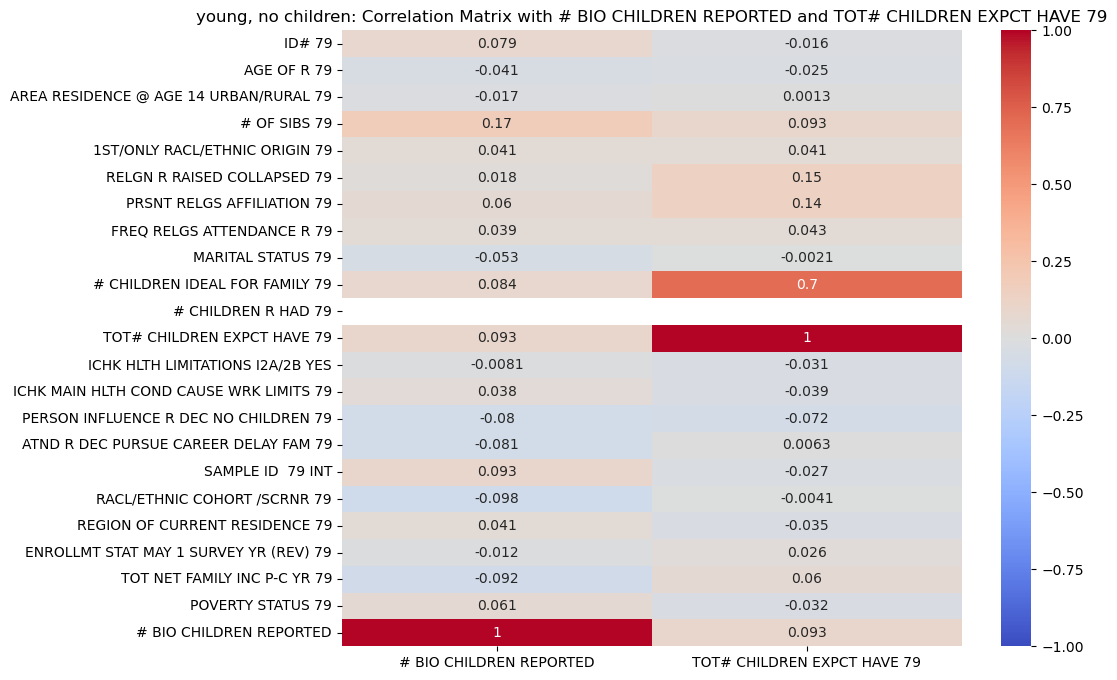

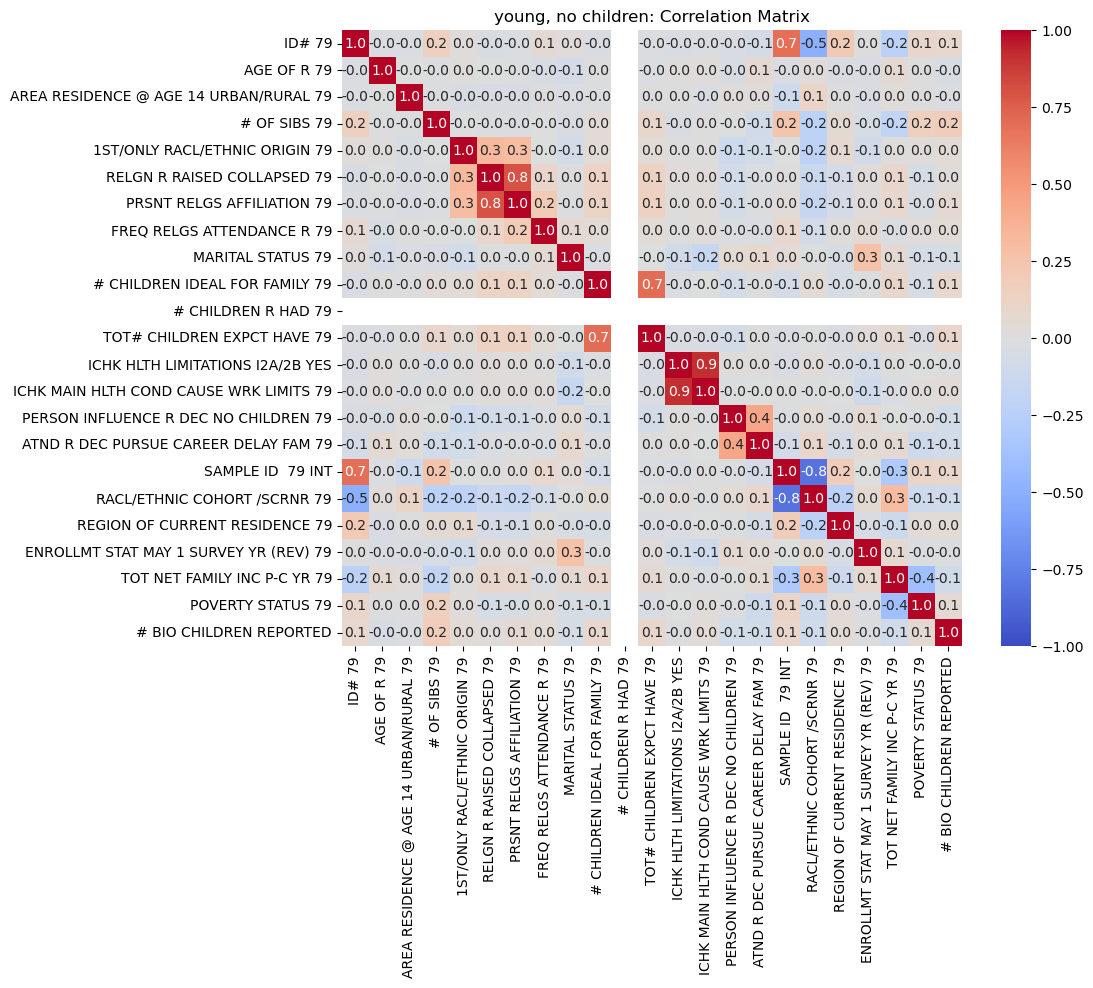

In [31]:
show_stats(df_young_no_children, "young, no children")


 mature, no children 



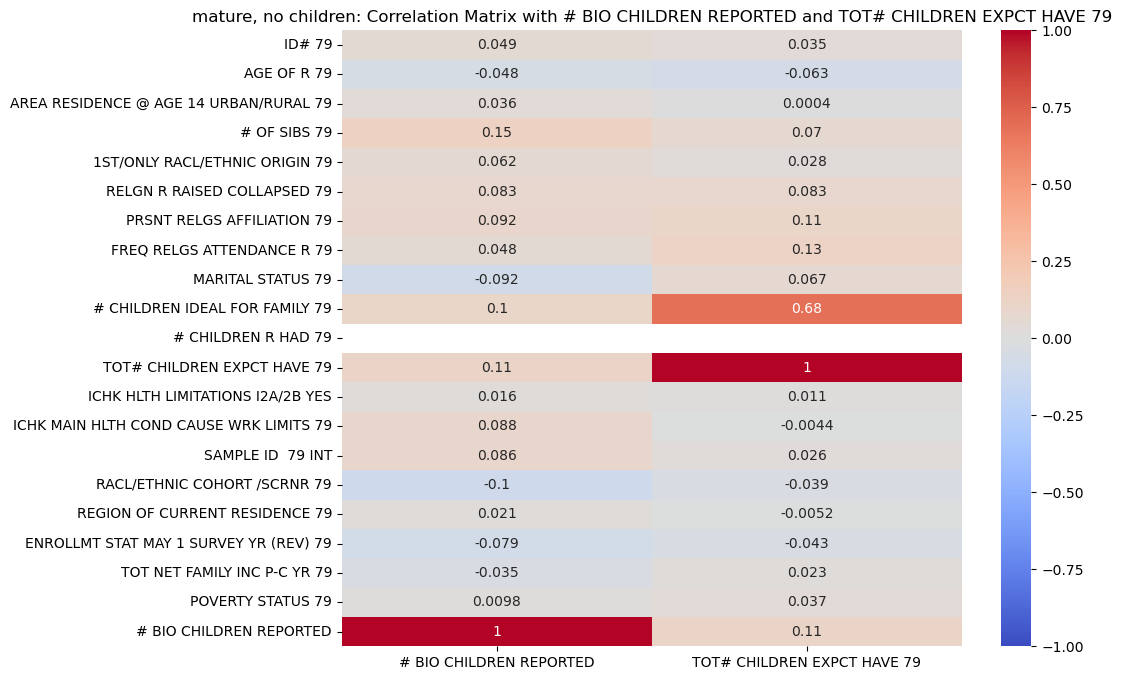

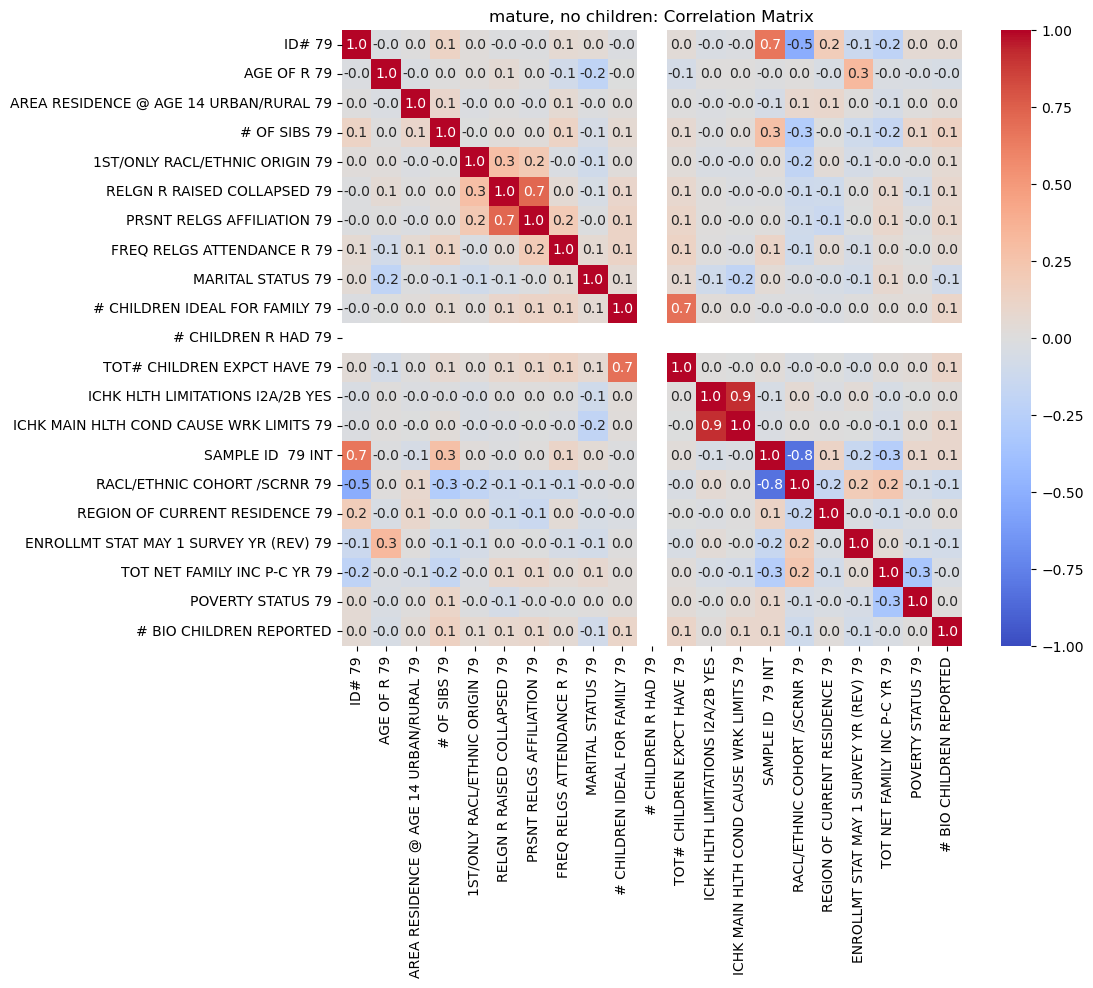

In [32]:
show_stats(df_mature_no_children, "mature, no children")


 mature, with children 



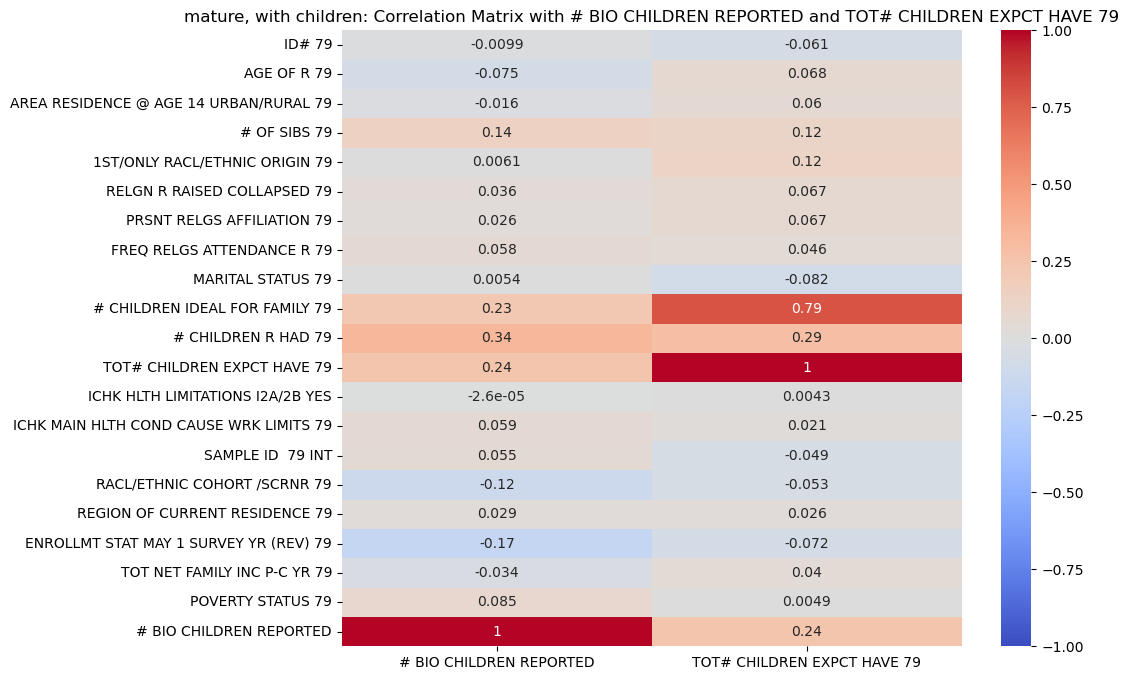

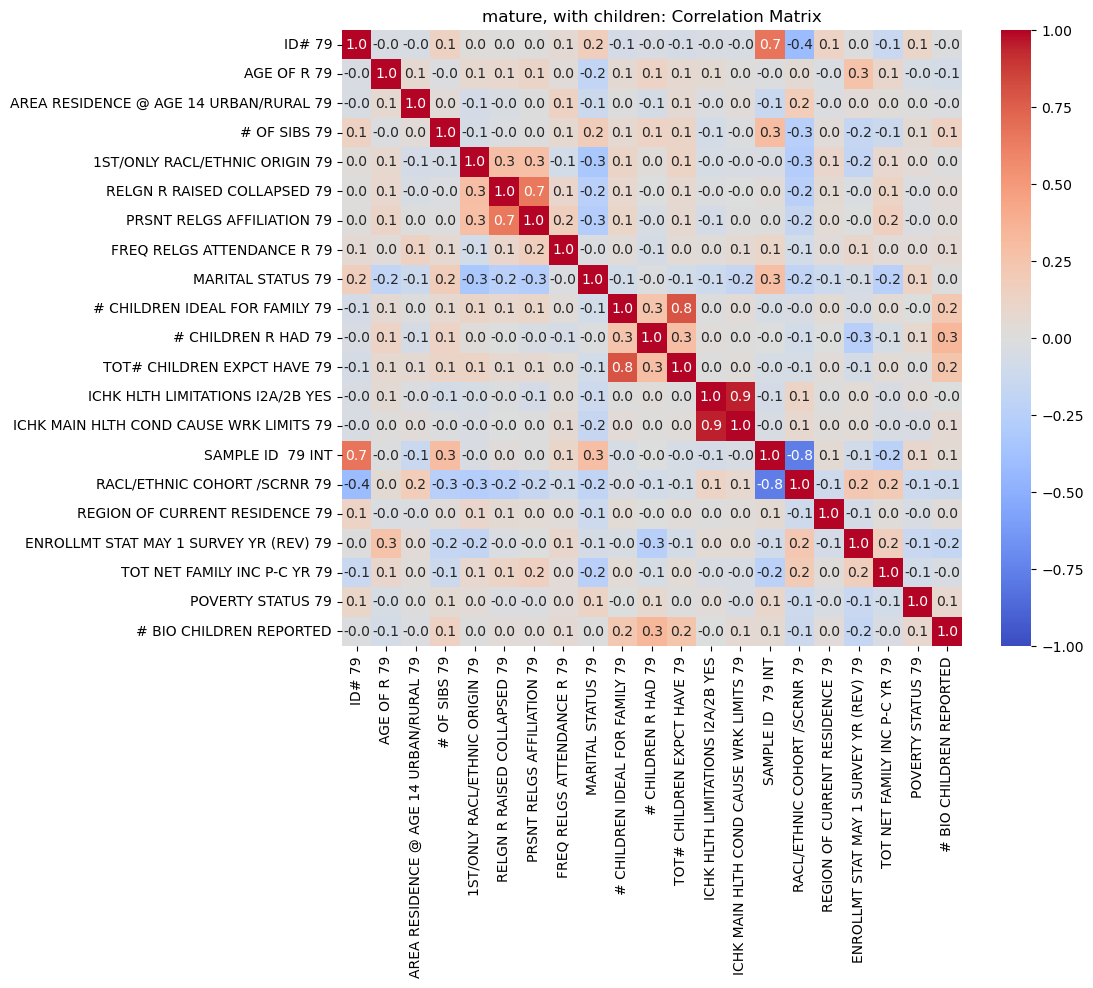

In [33]:
show_stats(df_mature_with_children, "mature, with children")